In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
MIN = 1
MAX = 100
NUM_DATA = 100
K = 3

In [3]:
x = np.random.randint(MIN, MAX, NUM_DATA)
y = np.random.randint(MIN, MAX, NUM_DATA)

data = np.array([x, y])
data = np.reshape(data, (NUM_DATA, 2))
clusters = np.zeros(NUM_DATA)

In [4]:
data.shape

(100, 2)

In [6]:
centroids = [ [np.random.randint(MAX), np.random.randint(MAX)] for i in range(K)]

print(centroids)

[[89, 9], [85, 54], [12, 31]]


In [7]:
def assign():
    updated_clusters = np.zeros(NUM_DATA)
    for data_idx, value in enumerate(data):
        min_distance = 1000.0
        cluster_idx = 0
        for i, centroid in enumerate(centroids):
            distance = (value[0] - centroid[0]) ** 2 + (value[1] - centroid[1]) ** 2
            if distance < min_distance:
                min_distance = distance
                cluster_idx = i
        
        updated_clusters[data_idx] = cluster_idx
    
    return updated_clusters

In [8]:
def visualize():
    fig = plt.figure(figsize=(5, 5))

    colmap = {0: 'r', 1: 'g', 2: 'b'}

    for i, value in enumerate(data):
        plt.scatter(value[0], value[1], color=colmap[clusters[i]], alpha=0.5)
        
    for i, centroid in enumerate(centroids):
        plt.scatter(centroid[0], centroid[1], color=colmap[i])

    plt.xlim(MIN, MAX)
    plt.ylim(MIN, MAX)
    plt.show() 

In [9]:
def update_centroids():
    for i in range(K):
        indexes = clusters == i
        cluster = data[indexes]

        centroids[i][0] = np.mean(cluster[:,0])
        centroids[i][1] = np.mean(cluster[:,1])

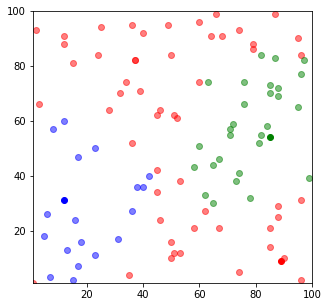

In [12]:
clusters = assign()
visualize()

In [16]:
while True:
    update_centroids()
    updated_clusters = assign()
    
    if np.array_equal(updated_clusters, clusters) == True:
        break
        
    clusters = updated_clusters

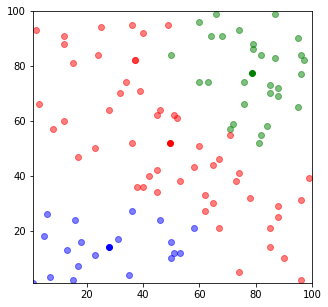

In [17]:
visualize()